In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.dates as mdates


In [68]:
wuhan_df = pd.read_csv("CleanDatasets/wuhan_AQI.csv")
wuhan_df = wuhan_df.sort_values("date")
wuhan_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,131,56,13,37,3,12,131
1,2019-01-03,158,61,15,31,7,15,158
2,2019-01-04,165,72,16,28,4,14,165
3,2019-01-05,182,99,20,27,4,14,182
4,2019-01-06,224,116,16,34,7,20,224
...,...,...,...,...,...,...,...,...
554,2020-07-17,80,49,59,23,5,14,80
555,2020-07-18,109,45,25,14,3,9,109
556,2020-07-19,99,25,48,10,2,6,99
557,2020-07-20,70,64,103,15,3,9,103


In [69]:
wuhan_lockdown_df=wuhan_df[(wuhan_df['date']>='2020-01-23') & (wuhan_df['date']<='2020-04-08')]
wuhan_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
378,2020-01-23,173,71,21,12,3,12,173
379,2020-01-24,174,39,28,7,2,5,174
380,2020-01-25,116,46,23,7,2,7,116
381,2020-01-26,131,32,30,6,3,5,131
382,2020-01-27,104,45,28,6,2,8,104
...,...,...,...,...,...,...,...,...
450,2020-04-04,156,60,61,18,5,10,156
451,2020-04-05,150,64,85,20,5,9,150
452,2020-04-06,151,55,52,17,5,7,151
453,2020-04-07,100,55,62,23,6,8,100


In [70]:
wuhan_lockdown_df = wuhan_lockdown_df.set_index("date")
wuhan_lockdown_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-01-23,173,71,21,12,3,12,173
2020-01-24,174,39,28,7,2,5,174
2020-01-25,116,46,23,7,2,7,116
2020-01-26,131,32,30,6,3,5,131
2020-01-27,104,45,28,6,2,8,104
...,...,...,...,...,...,...,...
2020-04-04,156,60,61,18,5,10,156
2020-04-05,150,64,85,20,5,9,150
2020-04-06,151,55,52,17,5,7,151


In [71]:
wuhan_df = wuhan_df.set_index("date")
wuhan_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-02,131,56,13,37,3,12,131
2019-01-03,158,61,15,31,7,15,158
2019-01-04,165,72,16,28,4,14,165
2019-01-05,182,99,20,27,4,14,182
2019-01-06,224,116,16,34,7,20,224
...,...,...,...,...,...,...,...
2020-07-17,80,49,59,23,5,14,80
2020-07-18,109,45,25,14,3,9,109
2020-07-19,99,25,48,10,2,6,99


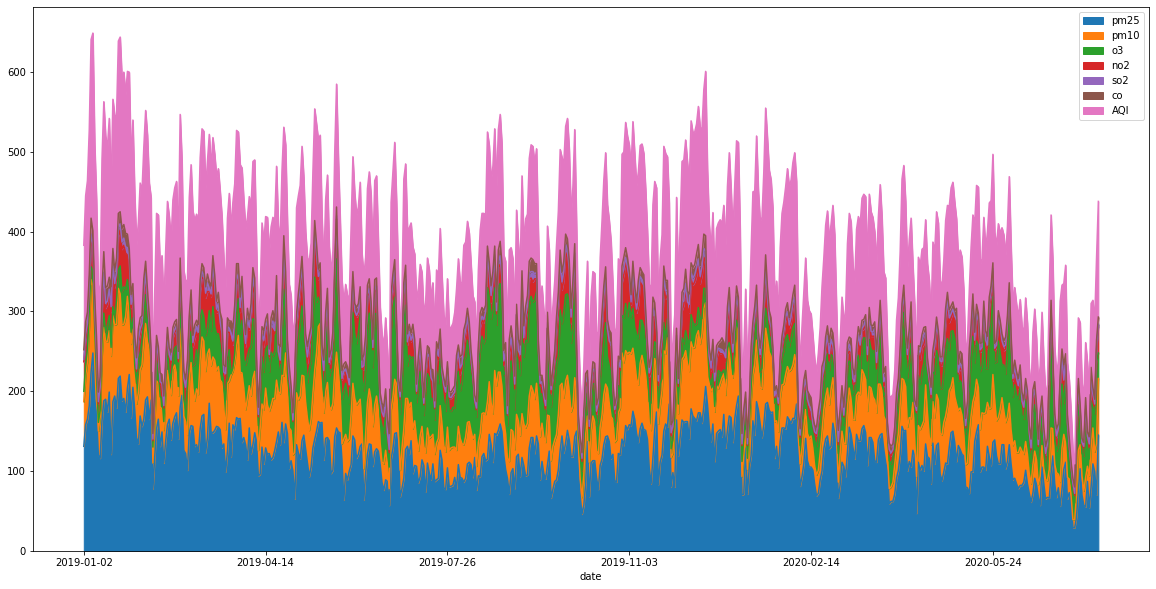

In [72]:
ax = wuhan_df.plot.area(figsize=(20,10))
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


In [73]:
wuhan_quartiles = wuhan_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["pm25"] < lower_bound) | (wuhan_df["pm25"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 99.0
The upper quartile of wuhan is: 149.5
The interquartile range of wuhan is: 50.5
Values below 23.25 could be outliers.
Values above 225.25 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-07,248,84,19,29,5,16,248


In [74]:
wuhan_quartiles = wuhan_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["pm10"] < lower_bound) | (wuhan_df["pm10"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 44.0
The upper quartile of wuhan is: 70.0
The interquartile range of wuhan is: 26.0
Values below 5.0 could be outliers.
Values above 109.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-06,224,116,16,34,7,20,224
2019-01-17,121,123,11,44,7,25,123
2019-01-21,216,113,23,42,11,18,216
2019-01-25,174,120,34,45,8,17,174
2019-01-26,204,115,21,31,9,17,204
2019-05-13,162,119,37,22,4,9,162
2019-05-14,160,125,23,38,4,11,160
2019-11-24,155,112,24,30,6,12,155
2019-12-13,160,112,19,55,10,14,160


In [75]:
wuhan_quartiles = wuhan_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["o3"] < lower_bound) | (wuhan_df["o3"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 26.0
The upper quartile of wuhan is: 64.5
The interquartile range of wuhan is: 38.5
Values below -31.75 could be outliers.
Values above 122.25 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-07-02,91,62,130,31,7,15,130
2019-08-17,115,72,143,32,8,12,143
2019-08-20,111,61,132,26,8,12,132
2019-09-12,122,68,125,26,6,13,125


In [76]:
wuhan_quartiles = wuhan_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["no2"] < lower_bound) | (wuhan_df["no2"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 16.0
The upper quartile of wuhan is: 30.0
The interquartile range of wuhan is: 14.0
Values below -5.0 could be outliers.
Values above 51.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-23,188,95,42,53,9,17,188
2019-01-24,191,93,47,52,9,17,191
2019-05-11,140,86,117,52,7,12,140
2019-05-12,150,98,64,52,8,13,150
2019-09-25,102,69,73,56,12,12,102
2019-09-26,126,81,95,52,10,13,126
2019-09-29,135,78,108,53,10,13,135
2019-10-31,132,104,56,54,7,15,132
2019-11-01,157,94,59,52,6,12,157


In [77]:
wuhan_quartiles = wuhan_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["so2"] < lower_bound) | (wuhan_df["so2"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 3.0
The upper quartile of wuhan is: 6.0
The interquartile range of wuhan is: 3.0
Values below -1.5 could be outliers.
Values above 10.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-21,216,113,23,42,11,18,216
2019-01-27,221,78,20,35,12,13,221
2019-03-13,142,105,33,45,11,11,142
2019-03-16,148,95,63,41,11,12,148
2019-04-18,117,74,53,33,11,13,117
2019-08-24,159,65,111,24,11,18,159
2019-08-31,103,47,65,23,11,14,103
2019-09-11,142,59,111,25,13,15,142
2019-09-25,102,69,73,56,12,12,102


In [78]:
wuhan_quartiles = wuhan_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["co"] < lower_bound) | (wuhan_df["co"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 8.0
The upper quartile of wuhan is: 13.0
The interquartile range of wuhan is: 5.0
Values below 0.5 could be outliers.
Values above 20.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-13,188,92,18,44,7,26,188
2019-01-17,121,123,11,44,7,25,123
2019-01-18,187,108,11,45,6,22,187
2019-09-05,117,55,119,25,10,25,119


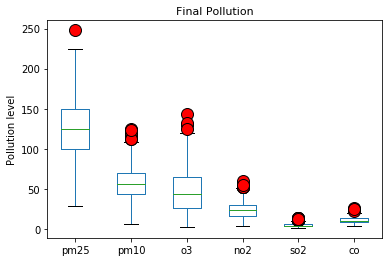

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = wuhan_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [80]:
wuhan_lockdown_quartiles =wuhan_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["pm25"] < lower_bound) | (wuhan_lockdown_df["pm25"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 104.0
The upper quartile of wuhan in lockdown is: 147.0
The interquartile range of wuhan in lockdown is: 43.0
Values below 39.5 could be outliers.
Values above 211.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [81]:
wuhan_lockdown_quartiles =wuhan_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["pm10"] < lower_bound) | (wuhan_lockdown_df["pm10"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 36.0
The upper quartile of wuhan in lockdown is: 61.0
The interquartile range of wuhan in lockdown is: 25.0
Values below -1.5 could be outliers.
Values above 98.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [82]:
wuhan_lockdown_quartiles =wuhan_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["o3"] < lower_bound) | (wuhan_lockdown_df["o3"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 28.0
The upper quartile of wuhan in lockdown is: 43.0
The interquartile range of wuhan in lockdown is: 15.0
Values below 5.5 could be outliers.
Values above 65.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-23,145,64,66,17,8,14,145
2020-04-05,150,64,85,20,5,9,150
2020-04-08,112,55,70,30,4,7,112


In [83]:
wuhan_lockdown_quartiles =wuhan_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["no2"] < lower_bound) | (wuhan_lockdown_df["no2"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 10.0
The upper quartile of wuhan in lockdown is: 18.0
The interquartile range of wuhan in lockdown is: 8.0
Values below -2.0 could be outliers.
Values above 30.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [84]:
wuhan_lockdown_quartiles =wuhan_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["so2"] < lower_bound) | (wuhan_lockdown_df["so2"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 3.0
The upper quartile of wuhan in lockdown is: 6.0
The interquartile range of wuhan in lockdown is: 3.0
Values below -1.5 could be outliers.
Values above 10.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-12,138,58,30,19,13,13,138


In [85]:
wuhan_lockdown_quartiles =wuhan_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lockdown_lowerq = wuhan_lockdown_quartiles[0.25]

# Compute the upper quartile
wuhan_lockdown_upperq = wuhan_lockdown_quartiles[0.75]
wuhan_lockdown_iqr = wuhan_lockdown_upperq-wuhan_lockdown_lowerq
print(f"The lower quartile of wuhan in lockdown is: {wuhan_lockdown_lowerq}")
print(f"The upper quartile of wuhan in lockdown is: {wuhan_lockdown_upperq}")
print(f"The interquartile range of wuhan in lockdown is: {wuhan_lockdown_iqr}")
lower_bound = wuhan_lockdown_lowerq - (1.5*wuhan_lockdown_iqr)
upper_bound =wuhan_lockdown_upperq + (1.5*wuhan_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan_lockdown = wuhan_lockdown_df.loc[(wuhan_lockdown_df["co"] < lower_bound) | (wuhan_lockdown_df["co"] > upper_bound)]
outlier_wuhan_lockdown

The lower quartile of wuhan in lockdown is: 8.0
The upper quartile of wuhan in lockdown is: 12.0
The interquartile range of wuhan in lockdown is: 4.0
Values below 2.0 could be outliers.
Values above 18.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


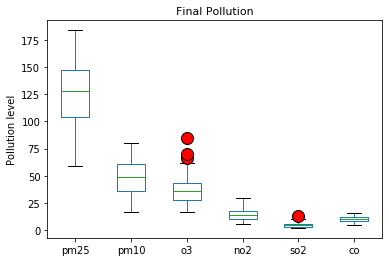

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = wuhan_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [88]:
delhi_df = pd.read_csv("CleanDatasets/delhi_AQI.csv")
delhi_df = delhi_df.sort_values(["date"])
delhi_df

,date,pm25,pm10,o3,no2,so2,co,AQI
450,2019-01-02,414,641,9,49,12,29,641
451,2019-01-03,480,604,10,39,9,27,604
452,2019-01-04,496,354,6,30,7,16,496
453,2019-01-05,352,454,11,38,10,19,454
454,2019-01-06,378,204,9,30,8,15,378
...,...,...,...,...,...,...,...,...
16,2020-07-18,132,66,4,12,8,11,132
17,2020-07-19,119,45,2,11,8,10,119
18,2020-07-20,97,53,8,13,8,11,97
19,2020-07-21,77,45,3,12,7,10,77


In [89]:
delhi_df = delhi_df.set_index("date")
delhi_df

,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-01-02,414,641,9,49,12,29,641
2019-01-03,480,604,10,39,9,27,604
2019-01-04,496,354,6,30,7,16,496
2019-01-05,352,454,11,38,10,19,454
2019-01-06,378,204,9,30,8,15,378
...,...,...,...,...,...,...,...
2020-07-18,132,66,4,12,8,11,132
2020-07-19,119,45,2,11,8,10,119
2020-07-20,97,53,8,13,8,11,97


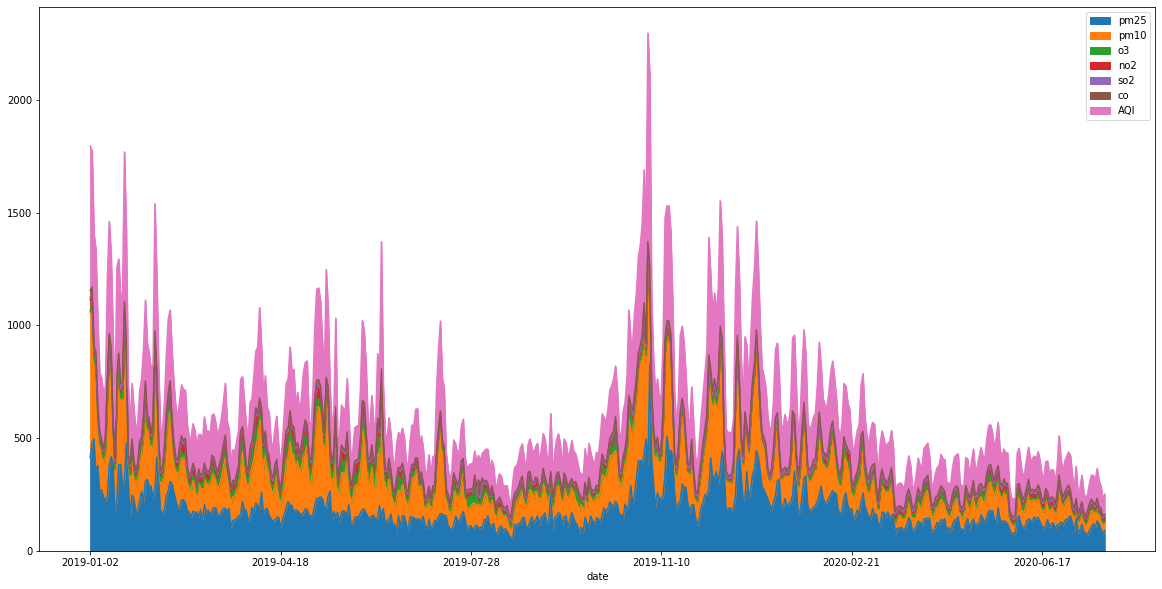

In [90]:
ax = delhi_df.plot.area(figsize=(20,10))